<a href="https://colab.research.google.com/github/mispelledname/ml_tutorials/blob/master/image_classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classify handwritten digits**
Practice image_classification on a different data set. 

**1. Import tensorflow and keras and other libraries.**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


**2. Load the data set.**

In [18]:
# Load the data
raw_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = raw_dataset.load_data()

# inspect the data
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


**3. Normalize the pixel values.**

In [0]:
# View an image
def view_image(i):
  plt.figure()
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
  plt.colorbar()
  plt.show()

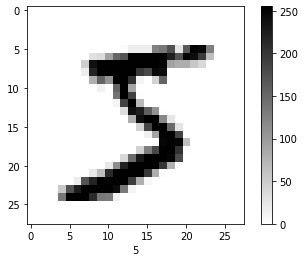

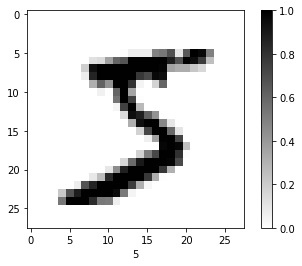

In [20]:
# View original image
view_image(0)

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# View the normalized image
view_image(0)

**4. Set up the layers of the model.**

In [22]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(10)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**5. Compile the model.**

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

**6. Fit the model.**

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0451 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

**7. Evaluate the model.**

In [31]:
model_loss, model_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: {:.4f}".format(model_acc))

313/313 - 0s - loss: 0.0845 - accuracy: 0.9777
Test accuracy: 0.9777


**8. Add Softmax layer to convert logits into probabilities.**

In [33]:
prob_model = tf.keras.Sequential([model, 
                                  tf.keras.layers.Softmax()])

prob_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 10)                101770    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**9. Make predictions.**

In [0]:
predictions = prob_model(test_images)

**10. Visualize the predictions.**

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label, 
                                       100*np.max(predictions_array),
                                       true_label, 
                                       color=color))
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

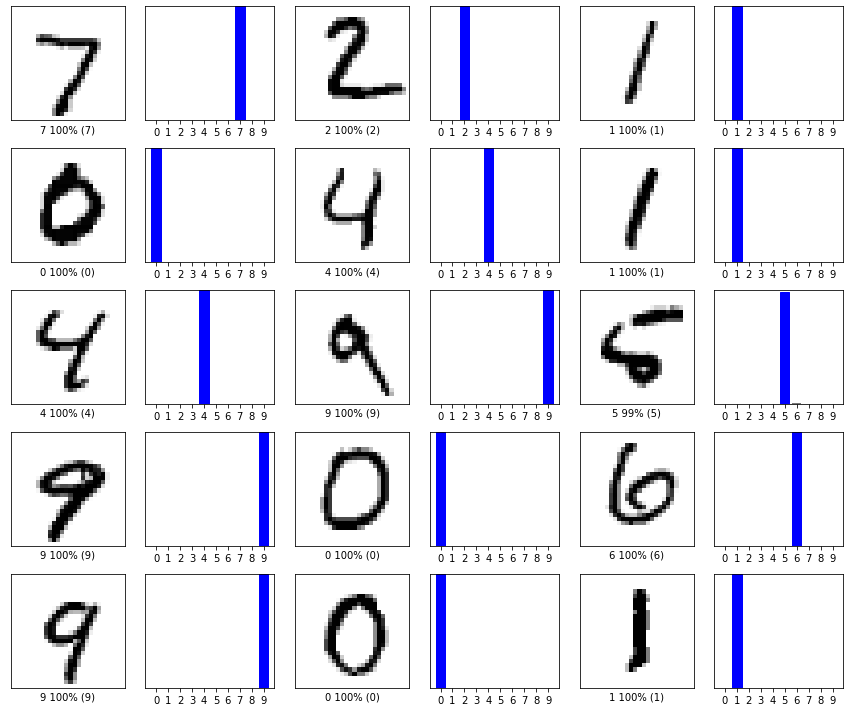

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()